In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import data from files

x_header = pd.read_csv("x_header.csv")
train_data = pd.read_csv('train_data.csv', header = None)
test_data = pd.read_csv('test_data.csv', header = None)
train_labels = pd.read_csv('train_labels.csv', header = None, dtype = 'category' )


#create variables 
header = pd.DataFrame(data = x_header)
x_train = pd.DataFrame(data = train_data)
x_train.columns = header.ID
x_test = pd.DataFrame(data = test_data)
x_test.columns = header.ID
y_train = pd.DataFrame(data = train_labels)
y_train.columns = ['Genre']



ID  Rhythm_Mean_1  Rhythm_Mean_2  Rhythm_Mean_3  Rhythm_Mean_4  Rhythm_Mean_5  \
0          1040.7         2315.6         2839.1         2552.2         2290.4   
1          2309.4         4780.4         4055.7         3120.5         1979.9   
2          2331.9         4607.0         4732.3         5007.0         3164.9   
3          3350.9         6274.4         5037.0         4609.7         3438.8   
4          2017.6         3351.8         2924.9         2726.3         1979.9   

ID  Rhythm_Mean_6  Rhythm_Mean_7  Rhythm_Mean_8  Rhythm_Mean_9  \
0          1913.8         2152.6         1930.3         2079.3   
1          2343.6         2634.2         3208.5         3078.0   
2          3171.9         2915.7         3282.3         2400.0   
3          3925.8         3746.4         3539.4         3053.7   
4          1930.9         2083.4         1889.2         1695.4   

ID  Rhythm_Mean_10     ...       MFCC_Max_3  MFCC_Max_4  MFCC_Max_5  \
0           1706.7     ...         0.216490  

In [17]:
#append x_y_train
x_y_train = x_train.join(y_train)

columns = ['Rhythm_Mean', 'Rhythm_Median', 'Rhythm_Var', 'Rhythm_Kurtosis', 'Rhythm_Skewness','Rhythm_Min', 
           'Rhythm_Max', "Chroma_Mean", "Chroma_Std", "Chroma_Min", "Chroma_Max", "MFCC_Mean", "MFCC_Std", "MFCC_Min", "MFCC_Max"]

#Summarize data with mean
xysum = pd.DataFrame(columns = columns)
for label in columns:
    df = x_y_train.loc[:, x_y_train.columns.str.contains(label)].mean(axis=1)
    xysum[label] = df
xysum['Genre'] = x_y_train.Genre

#Groupby stat
print(xysum.groupby(xysum.Genre).describe())

      Rhythm_Mean                                                      \
            count         mean          std          min          25%   
Genre                                                                   
1          2178.0  3155.274401  1049.234128   306.212792  2356.041823   
10           86.0  2371.414428   829.209711   746.419667  1717.539521   
2           618.0  2400.068381   900.049568   286.929500  1733.685146   
3           326.0  2689.174869   744.067956   689.948875  2165.166708   
4           253.0  1970.677546   750.300508   425.340667  1416.555333   
5           214.0  2883.563911   855.144882   738.913042  2298.920281   
6           260.0  2483.631531   745.155552  1012.107833  1896.662333   
7           141.0  2471.345740   804.493727   638.850750  1961.893167   
8           195.0  2828.095240   891.982423  1064.203792  2201.564812   
9            92.0  2372.595974   667.239201   877.924333  1948.577750   

                                             Rhyth

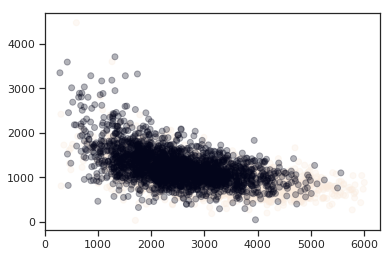

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


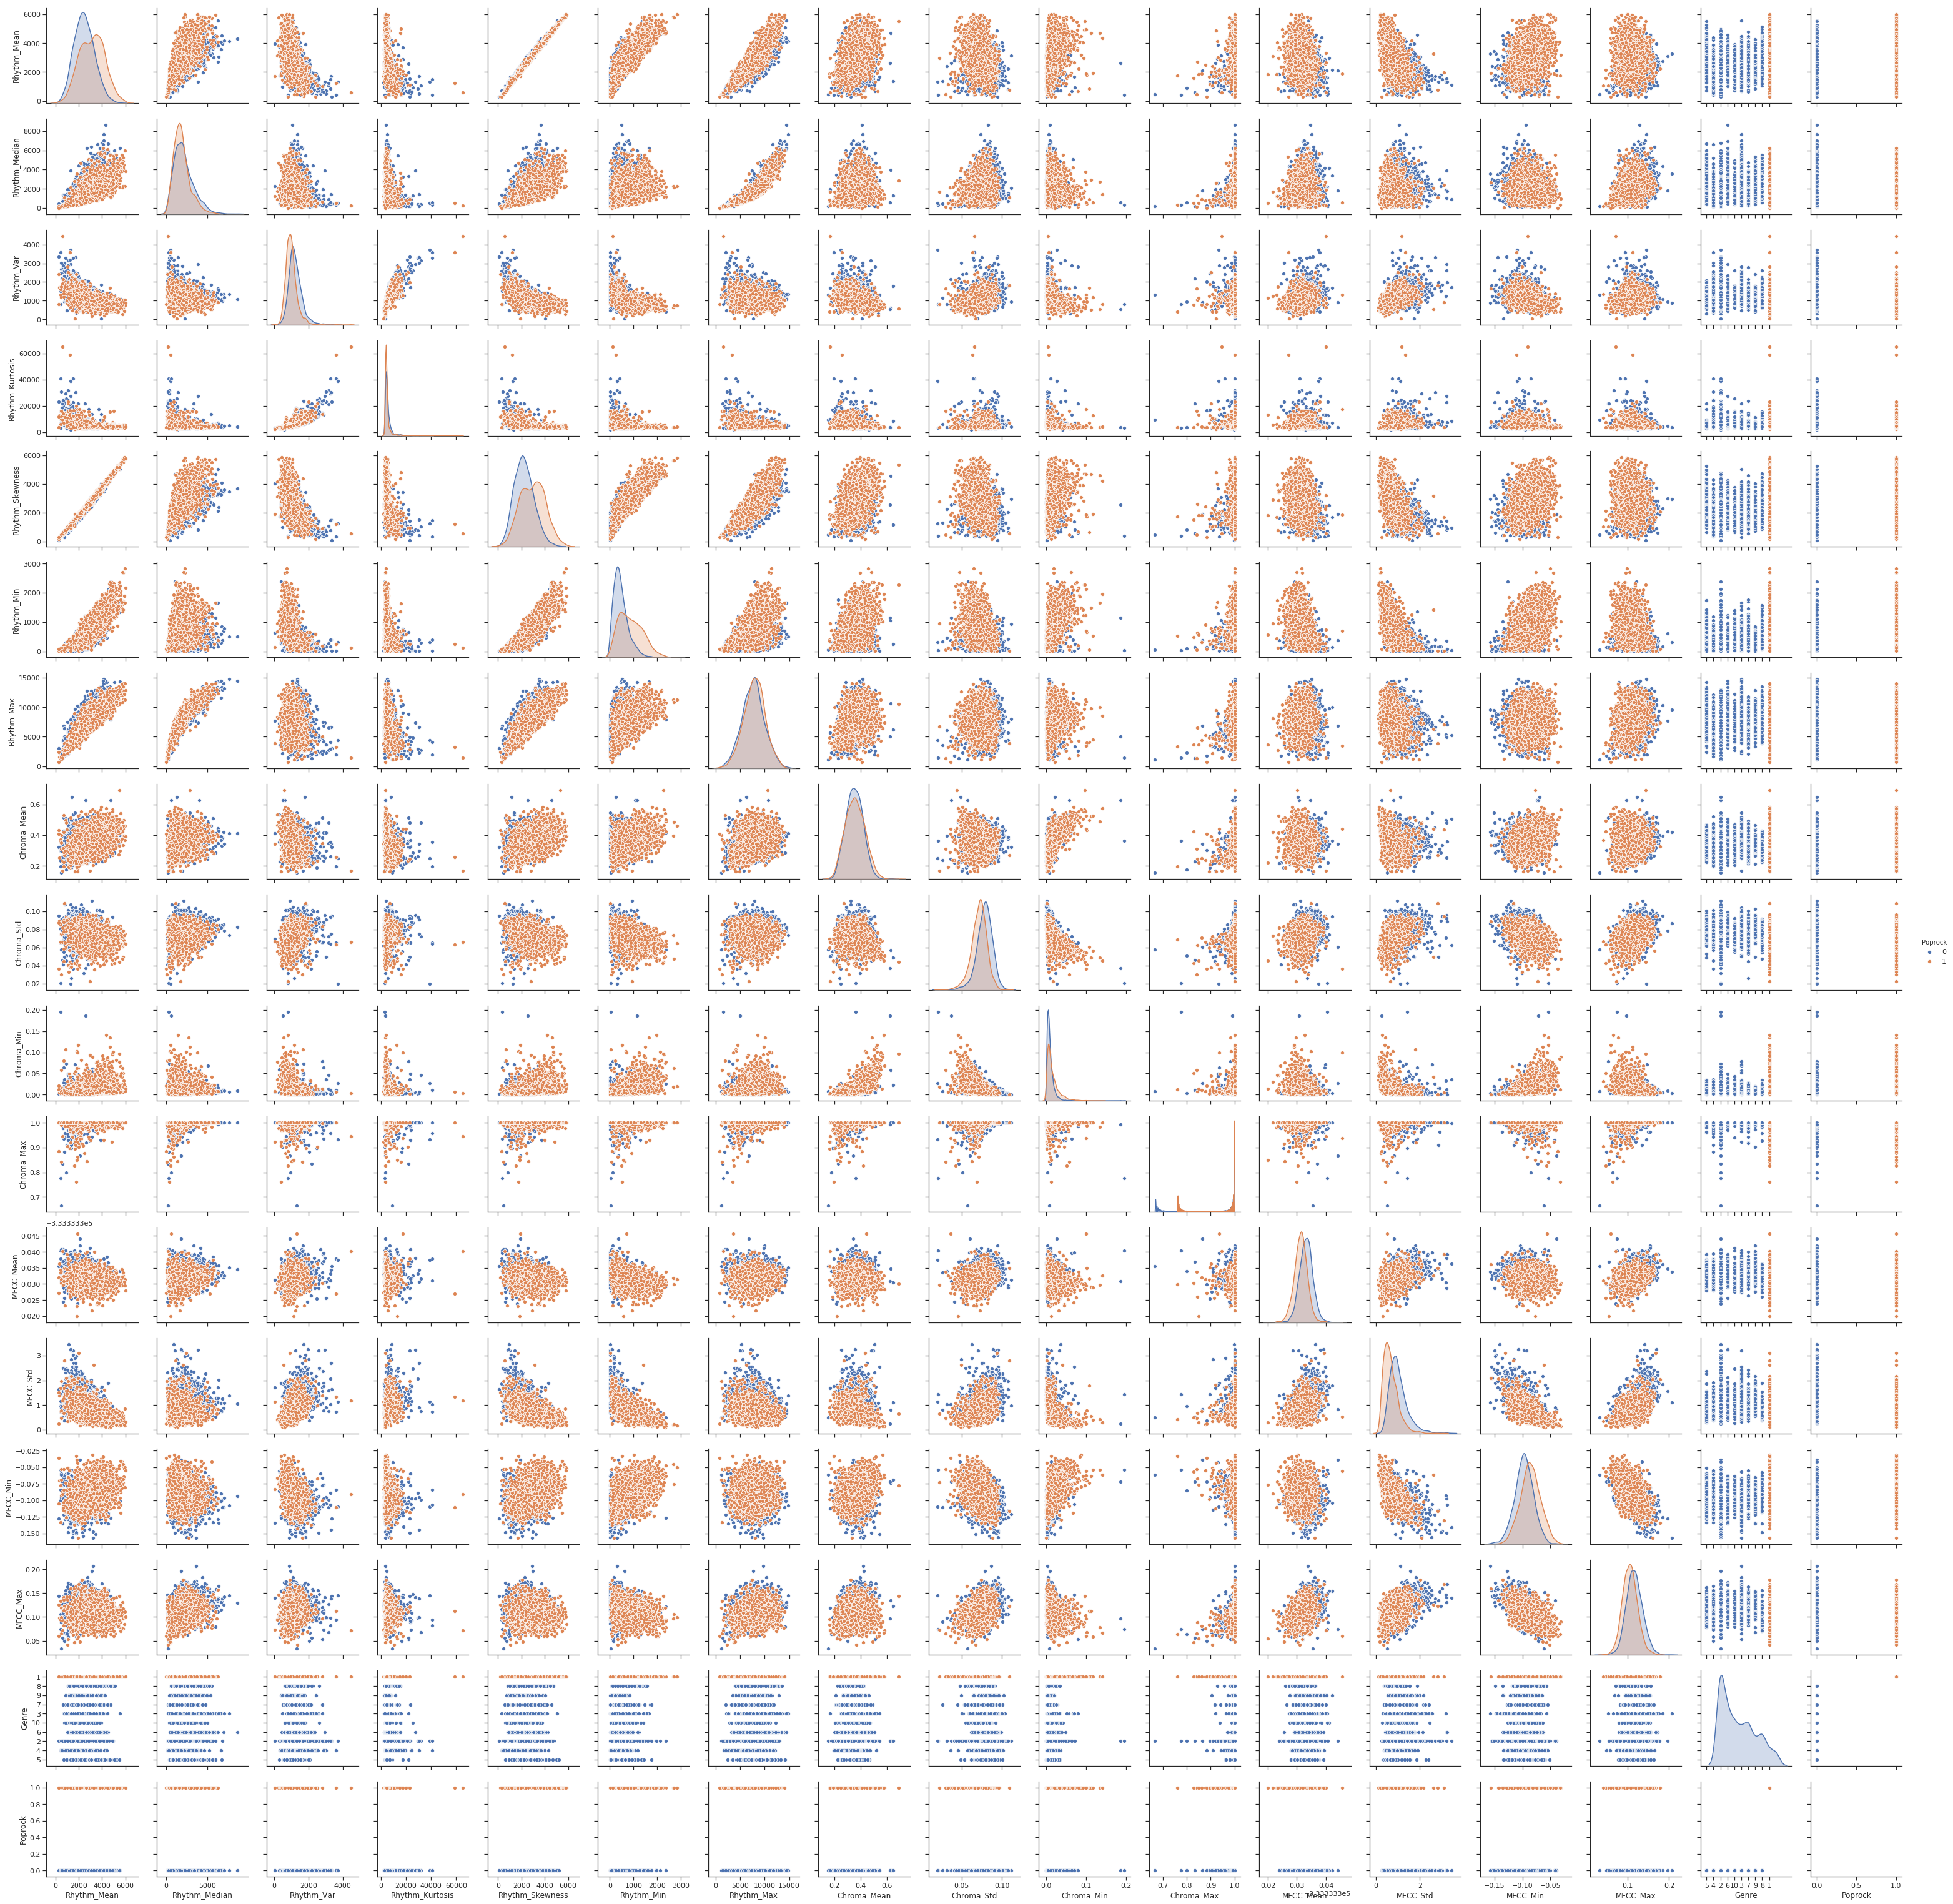

In [16]:
#Classify pop-rock
xysum['Poprock'] = np.where(xysum['Genre']=='1', 1, 0)
plt.scatter( xysum["Rhythm_Mean"], xysum["Rhythm_Var"], c = xysum['Poprock'], alpha = 0.3)
plt.show()

#To use normalize data for pairwise comparison
'''
#Pairwise comparison
import seaborn as sns; sns.set(style="ticks", color_codes=True)
sns.pairplot(xysum, hue=xysum.Poprock")
plt.show()
'''